# Home Task

Apply PCA to breast cancer dataset and visualize 2 principle components

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
df = pd.DataFrame(data= np.c_[cancer['data'], cancer['target']],
                     columns= list(cancer['feature_names']) + ['target'])

X = df.iloc[:, :30]
y = df['target']

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


In [4]:
def comress_score(X, X_approximate):
    return np.sum(np.apply_along_axis (np.linalg.norm,1, (X-X_approximate))**2)/\
        np.sum(np.apply_along_axis (np.linalg.norm,1, X)**2)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Z= pca.fit_transform(X_scaled)
print ('Z.shape = ',Z.shape)
X_approximate = pca.inverse_transform(Z)

print ('Compress score= {0:.3f}'.format(comress_score(X, X_approximate)))

Z.shape =  (569, 2)
Compress score= 0.999


## PCA Plot

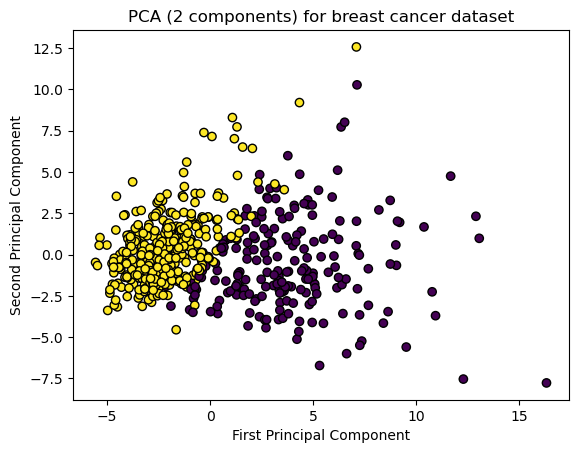

In [6]:
import matplotlib.pyplot as plt

plt.scatter(Z[:, 0], Z[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA (2 components) for breast cancer dataset')
plt.show()